In [55]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os 

all_files = glob.glob("/Users/sunitakoppar/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports" + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, parse_dates=True, header=0)
    li.append(df)
df = pd.concat(li, axis=0)


In [56]:
df.isnull().sum()

Province/State         246911
Country/Region         243652
Last Update            243652
Confirmed                  19
Deaths                    441
Recovered                 388
FIPS                    32618
Admin2                  32008
Province_State          21177
Country_Region           7617
Last_Update              7617
Lat                     11839
Long_                   11839
Active                   7617
Combined_Key             7617
Latitude               246470
Longitude              246470
Incidence_Rate         223033
Case-Fatality_Ratio    222911
dtype: int64

In [57]:
X=df[['Country/Region','Confirmed','Deaths','Recovered']]
Y=df[['Deaths','Recovered']]

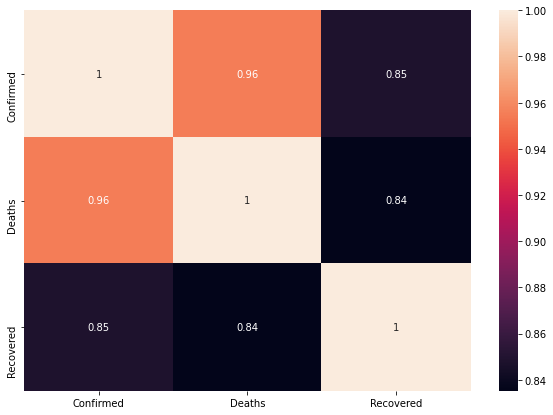

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True)
plt.show()

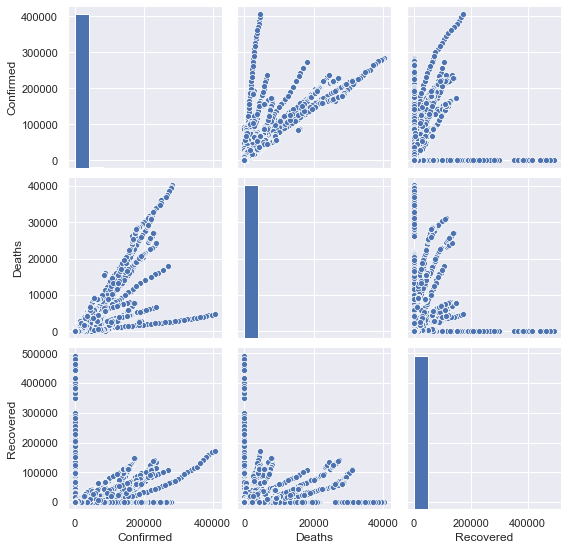

In [58]:
sns.pairplot(X)

In [31]:
from matplotlib.colors import ListedColormap

In [35]:
#the below few cells use csse_covid_19_daily_reports data. Later on I switched the dataset to use us reports
df["Country/Region"].unique()

array(['Mainland China', 'South Korea', 'Others', 'Italy', 'Japan',
       'Iran', 'Singapore', 'Hong Kong', 'US', 'Thailand', 'Bahrain',
       'Taiwan', 'Germany', 'Kuwait', 'Malaysia', 'France', 'Vietnam',
       'Spain', 'UK', 'United Arab Emirates', 'Macau', 'Australia',
       'Canada', 'Iraq', 'Oman', 'Croatia', 'India', 'Philippines',
       'Austria', 'Finland', 'Israel', 'Lebanon', 'Pakistan', 'Russia',
       'Sweden', 'Afghanistan', 'Algeria', 'Belgium', 'Brazil',
       'Cambodia', 'Egypt', 'Georgia', 'Greece', 'Nepal',
       'North Macedonia', 'Norway', 'Romania', 'Sri Lanka', 'Switzerland',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino',
       'Iran (Islamic Republic of)', 'Republic of Korea', 'Hong Kong SAR',
       'Iceland', 'Taipei and environs', 'Czech Republic', 'Portugal',
       'Ireland', 'Slovenia', 'Viet Nam', 'Indonesia',
       'occupied Palestinian territory', 'Qatar', 'Poland',
       'Saudi Arabia', 'Argentina', 'Ecuador', 'Chile', 'Azerbaijan

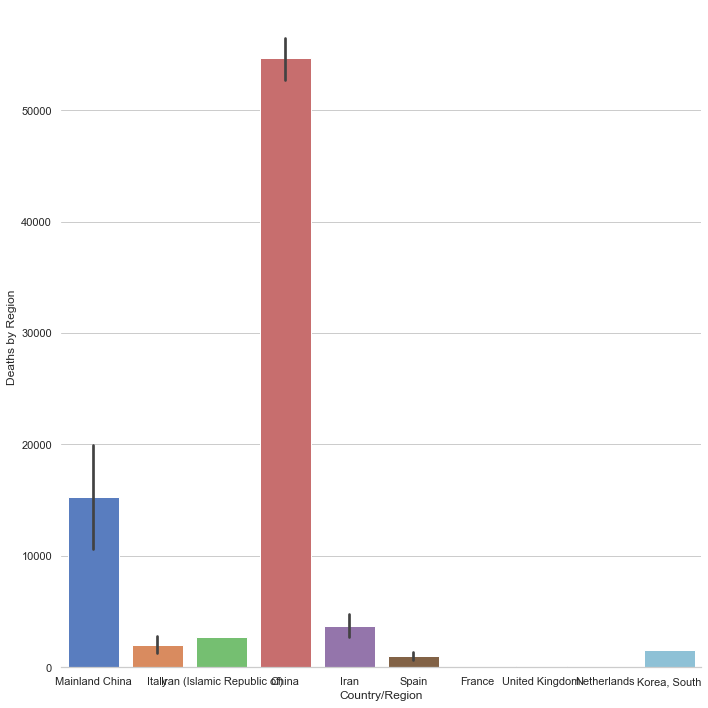

In [59]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Country/Region", y="Recovered",  data=df[df['Deaths']>100],
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Deaths by Region")

In [136]:
df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)

Country/Region
Mainland China    2058658.0
China              765031.0
France              78284.0
US                  50294.0
United Kingdom      20089.0
Netherlands         14254.0
Denmark              1326.0
Name: Confirmed, dtype: float64

In [60]:
import datetime
df['month']=pd.DatetimeIndex(df['Last Update']).month
df['year']=pd.DatetimeIndex(df['Last Update']).year
sns.set(rc={'figure.figsize':(11, 4)})
plt.show()

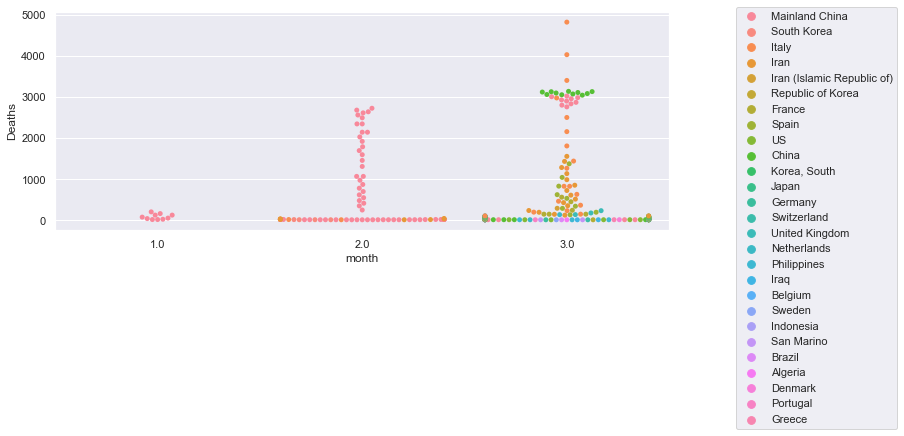

In [61]:
# g = sns.factorplot("month", "Deaths", "Recovered", data=df[df['Deaths']>1000], kind="bar", size=3, palette="muted", legend=True)
# # Set the `yscale`
# g.set(yscale="log")
# # Show plot
fig = plt.figure()
ax = plt.subplot(111)
sns.swarmplot(x="month", y="Deaths",hue="Country/Region", data=df[df['Deaths']>10])
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [7]:
import plotly.express as pdf.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False)

Country/Region
Mainland China    899639.0
China             741539.0
Iran               61336.0
Italy              36906.0
Korea, South       10855.0
                    ...   
Montenegro             0.0
Namibia                0.0
New Zealand            0.0
Nicaragua              0.0
 Azerbaijan            0.0
Name: Recovered, Length: 210, dtype: float64

In [35]:
import plotly.express as px
df1=df[df['Country/Region']=='US']
total_confirmed = df1.groupby('Last Update')['Confirmed'].sum()

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['Last Update'], y=total_confirmed,mode='lines+markers'))
fig.show()

Lets use the lookup data to gain further insights into the data. Since FIPS is relevant to US only, its a unique identifier for Counties within US, we will filter out for US data only

In [2]:
import folium
from folium import plugins
import plotly
import plotly.graph_objs as go

In [63]:
all_files = glob.glob("/Users/sunitakoppar/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us" + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, parse_dates=True, header=0)
    li.append(df)
df2 = pd.concat(li, axis=0)

lookup_df=pd.read_csv("/Users/sunitakoppar/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv")
usdf = df2.join(lookup_df,on='FIPS',how='inner',rsuffix='_lkp')
usdf.info()
usdf.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 0 to 12
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        3081 non-null   object 
 1   Country_Region        3081 non-null   object 
 2   Last_Update           3072 non-null   object 
 3   Lat                   3079 non-null   float64
 4   Long_                 3079 non-null   float64
 5   Confirmed             3081 non-null   int64  
 6   Deaths                3081 non-null   int64  
 7   Recovered             2222 non-null   float64
 8   Active                3064 non-null   float64
 9   FIPS                  3081 non-null   float64
 10  Incident_Rate         3079 non-null   float64
 11  People_Tested         3079 non-null   float64
 12  People_Hospitalized   2089 non-null   float64
 13  Mortality_Rate        3026 non-null   float64
 14  UID                   3081 non-null   int64  
 15  ISO3                  3

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,iso3,code3,FIPS_lkp,Admin2,Province_State_lkp,Country_Region_lkp,Lat_lkp,Long__lkp,Combined_Key,Population
0,Alabama,US,2020-05-02 02:32:31,32.3182,-86.9023,7294,289,0.0,7005.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-05-24 02:32:48,32.3182,-86.9023,14117,549,7951.0,5617.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-05-23 02:32:47,32.3182,-86.9023,13670,541,7951.0,5178.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-04-21 23:40:34,32.3182,-86.9023,5317,183,NaN,5134.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-04-20 23:36:47,32.3182,-86.9023,5079,163,NaN,4916.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-05-30 02:32:55,32.3182,-86.9023,17031,610,9355.0,7066.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-05-29 02:32:58,32.3182,-86.9023,16530,591,9355.0,6584.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-04-15 22:56:51,32.3182,-86.9023,4075,118,NaN,3957.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-04-14 23:33:31,32.3182,-86.9023,3953,114,NaN,3839.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0
0,Alabama,US,2020-05-18 02:32:26,32.3182,-86.9023,11771,488,NaN,11283.0,1.0,...,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,Albania,2877800.0


In [68]:
fig = go.Figure()
fig = px.line(usdf, x="Last_Update", y="Confirmed", color='Province_State')
fig.show()


In [78]:
m = folium.Map(location=[37, -102], zoom_start=4,tiles='Stamenterrain')
us_latlong=usdf[(usdf['Lat'].notnull()) & (usdf['Deaths']>0)]
for lat, lon, val, name in zip(us_latlong['Lat'],us_latlong['Long_'],us_latlong['Deaths'],us_latlong['Province_State']):
    folium.CircleMarker([lat,lon],radius=val*0.8,popup=str(name).capitalize())
    
m

Creating an SIR model for COVID Analysis:


In [82]:
#Lets plot the population of Each States and focus on 2 states to work on SIR model
lookup_df=lookup_df[lookup_df['Province_State'].notnull()]
lookup_df[['Province_State','Population']].head(50)

,Province_State,Population
23,Acre,881935.0
24,Alagoas,3337357.0
25,Amapa,845731.0
26,Amazonas,4144597.0
27,Bahia,14873064.0
28,Ceara,9132078.0
29,Distrito Federal,3015268.0
30,Espirito Santo,4018650.0
31,Goias,7018354.0
32,Maranhao,7075181.0
